In [1]:
import sys 
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn
print( 'Python {}'.format(sys.version))
print ('Numpy :{}'.format(numpy.__version__))
print ('Pandas :{}'.format(pandas.__version__))
print ('Matplotlib :{}'.format(matplotlib.__version__))
print ('Seaborn :{}'.format(seaborn.__version__))
print ('Scipy :{}'.format(scipy.__version__))
print ('Sklearn:{}'.format(sklearn.__version__))

Python 3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
Numpy :1.12.1
Pandas :0.20.1
Matplotlib :2.0.2
Seaborn :0.7.1
Scipy :0.19.0
Sklearn:0.19.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
print(data.shape)

(284807, 31)


In [6]:
print(data.describe)

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -

In [7]:
data = data.sample(frac=1, random_state=1)
print(data.shape)

(284807, 31)


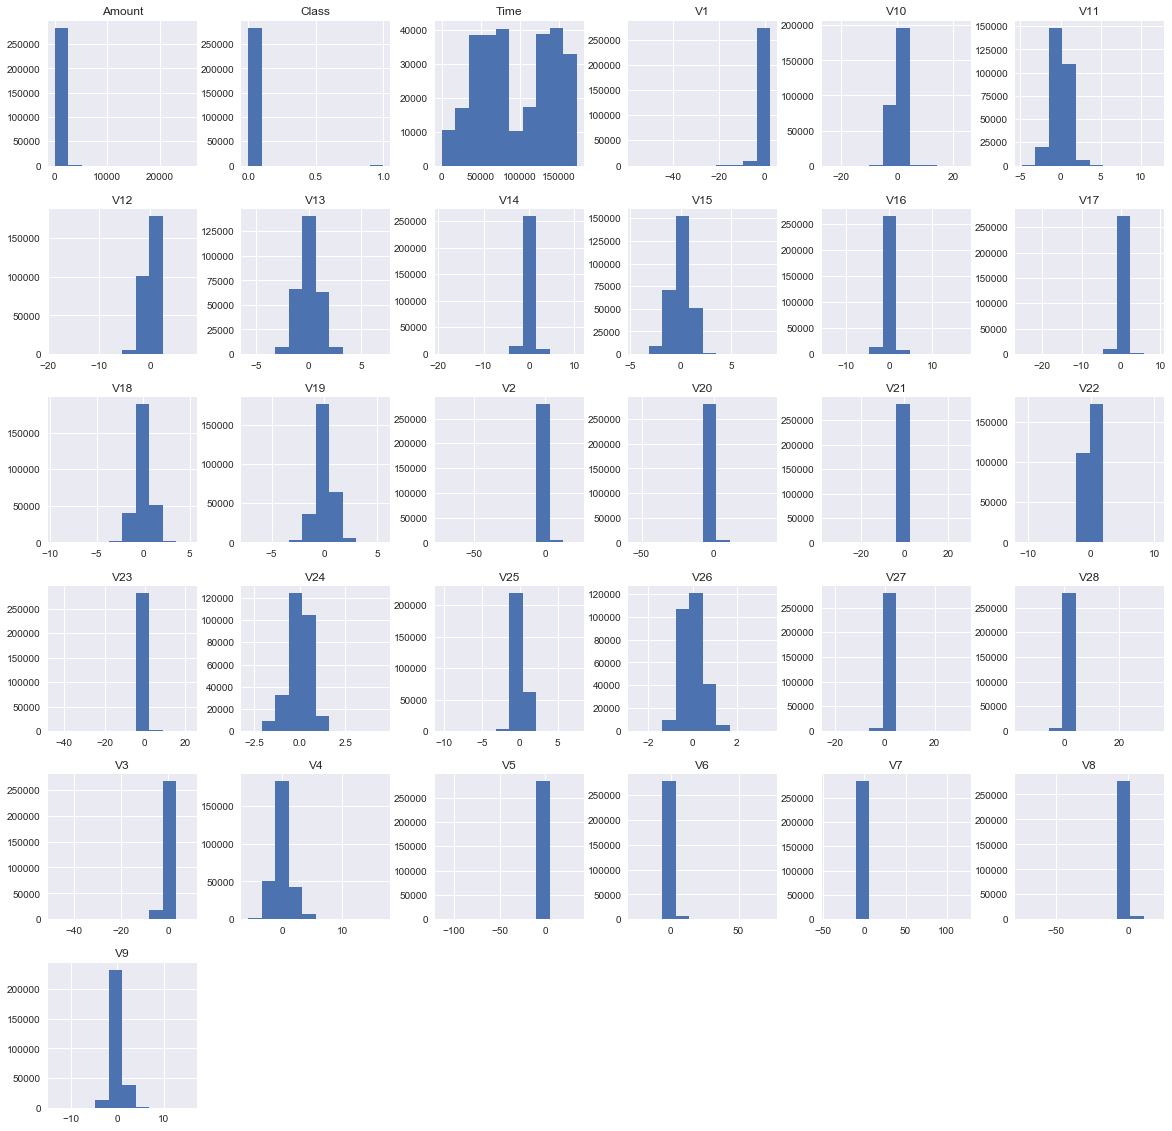

In [8]:
data.hist(figsize=(20,20))
plt.show()

In [9]:
#Determine the number of fraud cases
fraud = data[data['Class']==1]
valid = data[data['Class']==0]

outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)

print('Fraud cases:{}'.format(len(fraud)))
print('valid cases:{}'.format(len(valid)))

0.0017304750013189597
Fraud cases:492
valid cases:284315


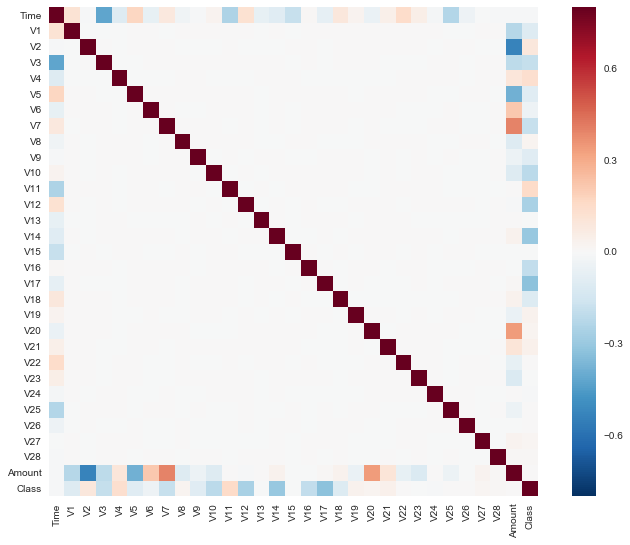

In [10]:
#Corelation matrix
corrmat = data.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmat,vmax=.8, square= True)
plt.show()


In [11]:
#Get all the columns from DataFrame

columns = data.columns.tolist()

#Filter the column to remove data we don't need

columns = [c for c in columns if c not in ['Class']]

# Store the variable we'll be predictin in

target ="Class"

Y = data['Class']
X = data.drop(['Class'], axis = 1)

print(X.shape , Y.shape)

(284807, 30) (284807,)


In [12]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor



state =1

classifier = {
    "Isolation Forest":IsolationForest(max_samples=len(X),
                       contamination = outlier_fraction,
                       random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors =20,
        contamination = outlier_fraction)
}


In [13]:
plt.figure(figsize=(9,7))
n_outliers= len(fraud)

for i,(clf_name,clf) in enumerate(classifier.items()):
    if clf_name =="Local Outlier Factor":
        y_pred =clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
        
    n_errors = (y_pred!=Y).sum()
        
    print('{}:{}'.format(clf_name,n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

Isolation Forest:659
0.997686152377
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.33      0.33      0.33       492

avg / total       1.00      1.00      1.00    284807

Local Outlier Factor:935
0.996717075072
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.05      0.05      0.05       492

avg / total       1.00      1.00      1.00    284807

